In [1]:
!pip install wordcloud

In [2]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import FreqDist
from nltk import wordnet

import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer

In [200]:
# Load in the dataframe
df = pd.read_csv("All Airlines.csv", index_col=0)

In [201]:
# Looking at first 5 rows of the dataset
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,United Airlines,1.0,Zachary Christensen,21st May 2022,✅ Trip Verified | Worst experience I have ever...,NaN,Couple Leisure,Economy Class,"Salt Lake City to Portland, Maine",22-May,1.0,1.0,NaN,NaN,1.0,1.0,no
1,United Airlines,2.0,Barbara Contente,21st May 2022,✅ Trip Verified | Very displeased with the fac...,NaN,Solo Leisure,Economy Class,Los Angeles to Lisbon via Washington,22-May,1.0,3.0,2.0,3.0,3.0,2.0,no
2,United Airlines,1.0,Gabe Hunters,21st May 2022,Not Verified | Absolutely terrible experience....,NaN,Family Leisure,Economy Class,"Kansas City, Missouri to Newark, New York",22-May,1.0,1.0,1.0,1.0,1.0,1.0,no
3,United Airlines,1.0,N Geale,21st May 2022,✅ Trip Verified | We were scheduled to leave P...,NaN,Couple Leisure,Economy Class,Pittsburgh to Newark,22-May,3.0,3.0,NaN,NaN,1.0,1.0,no
4,United Airlines,8.0,R Gonzaga,19th May 2022,✅ Trip Verified | First leg of trip to KUL. Dr...,Boeing 737-900Max,Solo Leisure,Premium Economy,Baltimore to Chicago O'Hare,22-May,2.0,4.0,3.0,NaN,2.0,4.0,yes


In [202]:
df[["airline", "customer_review","overall"]].head()

,airline,customer_review,overall
0,United Airlines,✅ Trip Verified | Worst experience I have ever...,1.0
1,United Airlines,✅ Trip Verified | Very displeased with the fac...,2.0
2,United Airlines,Not Verified | Absolutely terrible experience....,1.0
3,United Airlines,✅ Trip Verified | We were scheduled to leave P...,1.0
4,United Airlines,✅ Trip Verified | First leg of trip to KUL. Dr...,8.0


In [203]:
# Groupby by country
airlines = df.groupby("airline")

# Summary statistic of all countries
airlines.describe().head()

overall                                                \
                     count      mean       std  min  25%  50%  75%   max   
airline                                                                    
Alaska Airlines      787.0  4.494282  3.677648  1.0  1.0  3.0  9.0  10.0   
American Airlines   3957.0  2.625727  2.729955  1.0  1.0  1.0  3.0  10.0   
Delta Air Lines      618.0  2.807443  3.046928  1.0  1.0  1.0  3.0  10.0   
Southwest Airlines  1402.0  4.296719  3.657984  1.0  1.0  2.0  9.0  10.0   
United Airlines     4729.0  2.760626  2.862731  1.0  1.0  1.0  3.0  10.0   

                   seat_comfort            ... ground_service       \
                          count      mean  ...            75%  max   
airline                                    ...                       
Alaska Airlines           743.0  2.874832  ...            4.0  5.0   
American Airlines        3825.0  2.133333  ...            2.0  5.0   
Delta Air Lines           577.0  2.225303  ...            3.0  5.0   
Southwest Airlines       1355.0  2.688561  ...            4.0  5.0   
United Airlines          4496.0  2.141237  ...            3.0  5.0   

                   value_for_money                                          \
                             count      mean       std  min  25%  50%  75%   
airline                                                                      
Alaska Airlines              801.0  2.556804  1.606108  1.0  1.0  2.0  4.0   
American Airlines           3963.0  1.831188  1.314124  1.0  1.0  1.0  2.0   
Delta Air Lines              617.0  1.904376  1.397678  1.0  1.0  1.0  2.0   
Southwest Airlines          1450.0  2.653103  1.630564  1.0  1.0  2.0  4.0   
United Airlines             4727.0  1.887667  1.338842  1.0  1.0  1.0  3.0   

                         
                    max  
airline                  
Alaska Airlines     5.0  
American Airlines   5.0  
Delta Air Lines     5.0  
Southwest Airlines  5.0  
United Airlines     5.0  

[5 rows x 56 columns]

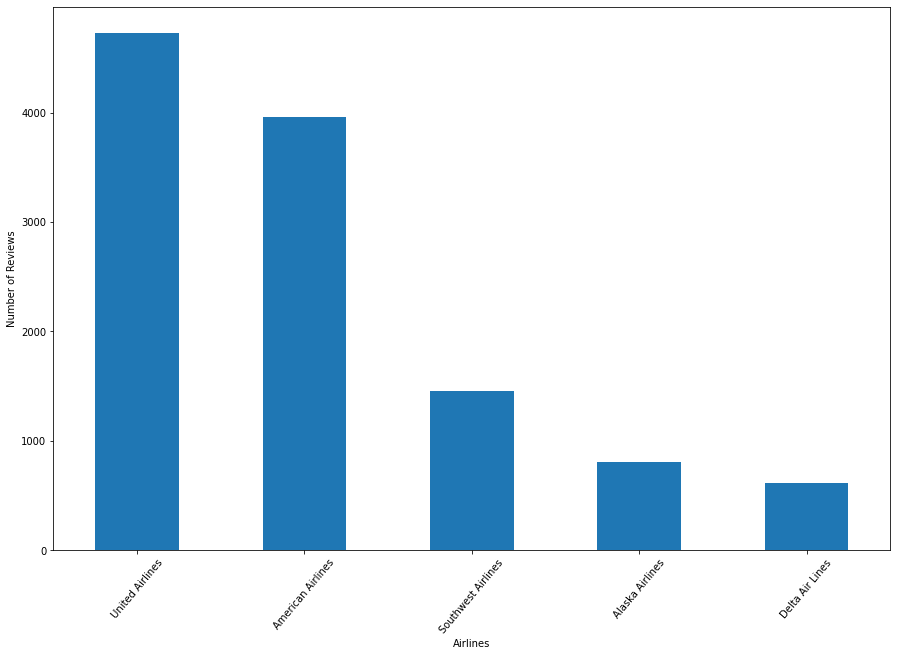

In [204]:
plt.figure(figsize=(15,10))
airlines.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Airlines")
plt.ylabel("Number of Reviews")
plt.show()

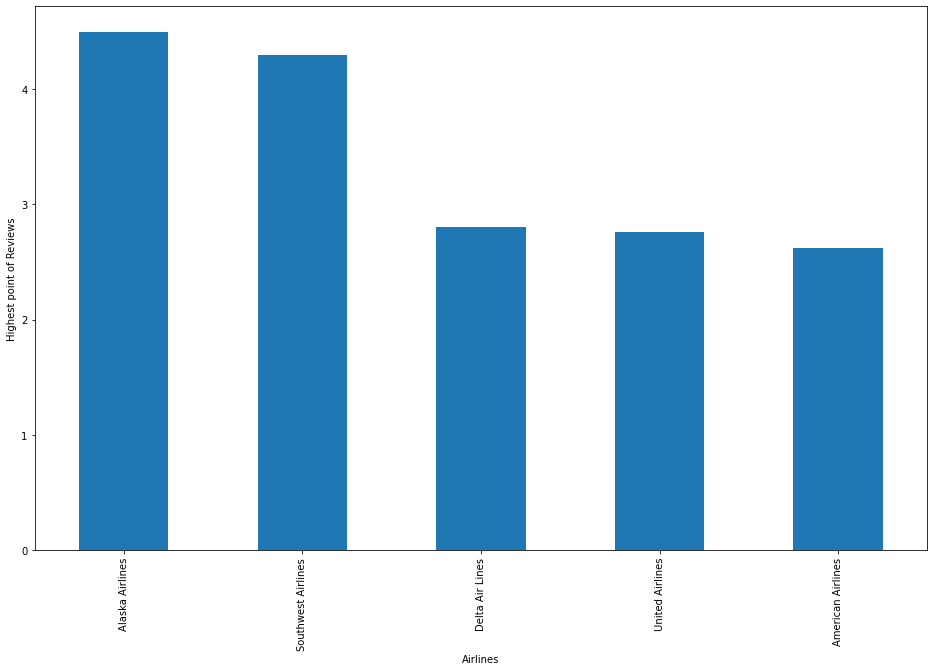

In [205]:
plt.figure(figsize=(16,10))
airlines.overall.mean().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=90)
plt.xlabel("Airlines")
plt.ylabel("Highest point of Reviews")
plt.show()

In [206]:
print(df.customer_review[0])

✅ Trip Verified | Worst experience I have ever had flying. I have never flown United and I do not plan to ever again. First flight was cancelled on the 19th of May and then again on the 20th once we flew to our layover in Chicago. Then they gave us invalid meal and hotel vouchers at the customer service desk in Chicago. We didn't find out until we took the shuttle to the hotel, so we had to find a place to stay. Our flight they got us on wasn't even to our original destination. They also took our bags when we didn't want them checked due to an overbooked flight. Also we tried the online service and calling which both were terrible and no help. This was supposed to be our honeymoon and now it doesn't exist because of terrible service. Never fly united. We lost double of what the ticket cost.


In [86]:
#df['customer_review'] = df['customer_review']\
                          .astype(str).str.replace(r"✅", '')

In [87]:
#df['customer_review'] = df['customer_review']\
                          .astype(str).str.replace(r"|", '')

In [207]:
df['customer_review'] = df['customer_review'].replace(np.nan, '')

In [67]:
#review = re.sub('[^a-zA-Z]', ' ', str(df['customer_review']))

In [68]:
#review

'         Trip Verified  Worst experience I have ever h             Trip Verified  Very displeased with the fact             Not Verified  Absolutely terrible experience               Trip Verified  We were scheduled to leave Pit             Trip Verified  First leg of trip to KUL  Drea                                                                      Flew from Seattle on December  rd  Arriving to            Traveled one way moving back home from Miami t            I would never have booked a flight with Americ            Had to cancel my trip because of American s mu            Flight that we were boarding in Denver arrived    Name  customer review  Length         dtype  object'

In [71]:
#print(review[10])

r


In [72]:
#df

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,United Airlines,1.0,Zachary Christensen,21st May 2022,Trip Verified Worst experience I have ever h...,NaN,Couple Leisure,Economy Class,"Salt Lake City to Portland, Maine",22-May,1.0,1.0,NaN,NaN,1.0,1.0,no
1,United Airlines,2.0,Barbara Contente,21st May 2022,Trip Verified Very displeased with the fact ...,NaN,Solo Leisure,Economy Class,Los Angeles to Lisbon via Washington,22-May,1.0,3.0,2.0,3.0,3.0,2.0,no
2,United Airlines,1.0,Gabe Hunters,21st May 2022,Not Verified Absolutely terrible experience. ...,NaN,Family Leisure,Economy Class,"Kansas City, Missouri to Newark, New York",22-May,1.0,1.0,1.0,1.0,1.0,1.0,no
3,United Airlines,1.0,N Geale,21st May 2022,Trip Verified We were scheduled to leave Pit...,NaN,Couple Leisure,Economy Class,Pittsburgh to Newark,22-May,3.0,3.0,NaN,NaN,1.0,1.0,no
4,United Airlines,8.0,R Gonzaga,19th May 2022,Trip Verified First leg of trip to KUL. Drea...,Boeing 737-900Max,Solo Leisure,Premium Economy,Baltimore to Chicago O'Hare,22-May,2.0,4.0,3.0,NaN,2.0,4.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3958,American Airlines,1.0,Igor Fedichenia,9th December 2013,Flew from Seattle on December 3rd. Arriving to...,NaN,NaN,Economy Class,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,no
3959,American Airlines,5.0,Miro Cristiano,7th December 2013,Traveled one-way moving back home from Miami t...,NaN,NaN,Economy Class,NaN,NaN,4.0,3.0,3.0,1.0,NaN,3.0,yes
3960,American Airlines,1.0,L Blakley,6th December 2013,I would never have booked a flight with Americ...,NaN,NaN,Economy Class,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,no
3961,American Airlines,1.0,Selina Williams,5th December 2013,Had to cancel my trip because of American's mu...,NaN,NaN,Business Class,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,no


In [208]:
df

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,United Airlines,1.0,Zachary Christensen,21st May 2022,✅ Trip Verified | Worst experience I have ever...,NaN,Couple Leisure,Economy Class,"Salt Lake City to Portland, Maine",22-May,1.0,1.0,NaN,NaN,1.0,1.0,no
1,United Airlines,2.0,Barbara Contente,21st May 2022,✅ Trip Verified | Very displeased with the fac...,NaN,Solo Leisure,Economy Class,Los Angeles to Lisbon via Washington,22-May,1.0,3.0,2.0,3.0,3.0,2.0,no
2,United Airlines,1.0,Gabe Hunters,21st May 2022,Not Verified | Absolutely terrible experience....,NaN,Family Leisure,Economy Class,"Kansas City, Missouri to Newark, New York",22-May,1.0,1.0,1.0,1.0,1.0,1.0,no
3,United Airlines,1.0,N Geale,21st May 2022,✅ Trip Verified | We were scheduled to leave P...,NaN,Couple Leisure,Economy Class,Pittsburgh to Newark,22-May,3.0,3.0,NaN,NaN,1.0,1.0,no
4,United Airlines,8.0,R Gonzaga,19th May 2022,✅ Trip Verified | First leg of trip to KUL. Dr...,Boeing 737-900Max,Solo Leisure,Premium Economy,Baltimore to Chicago O'Hare,22-May,2.0,4.0,3.0,NaN,2.0,4.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11568,American Airlines,1.0,Igor Fedichenia,9th December 2013,Flew from Seattle on December 3rd. Arriving to...,NaN,NaN,Economy Class,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,no
11569,American Airlines,5.0,Miro Cristiano,7th December 2013,Traveled one-way moving back home from Miami t...,NaN,NaN,Economy Class,NaN,NaN,4.0,3.0,3.0,1.0,NaN,3.0,yes
11570,American Airlines,1.0,L Blakley,6th December 2013,I would never have booked a flight with Americ...,NaN,NaN,Economy Class,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,no
11571,American Airlines,1.0,Selina Williams,5th December 2013,Had to cancel my trip because of American's mu...,NaN,NaN,Business Class,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,no


In [209]:
df['review_date'] = pd.to_datetime(df['review_date'])

In [210]:
df.sort_values(by='review_date', inplace=True)

In [211]:
df

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
7609,Alaska Airlines,8.0,P Sorli,2011-10-24,YVR-LAX-YVR. Both flights relatively full and ...,NaN,NaN,Economy Class,NaN,NaN,4.0,4.0,3.0,NaN,NaN,5.0,yes
7608,Alaska Airlines,3.0,S Oesterblad,2011-10-26,I filled out everything from seat number to me...,NaN,NaN,Economy Class,NaN,NaN,3.0,3.0,2.0,2.0,NaN,2.0,no
6185,Southwest Airlines,10.0,M Ball,2011-10-31,LAX-MSP-LAX. A bit quirky typical boarding pro...,NaN,NaN,Economy Class,NaN,NaN,4.0,5.0,4.0,NaN,NaN,5.0,yes
6184,Southwest Airlines,9.0,Sean Symon,2011-11-01,IND-BWI and BWI-IND. First trip was on a Boein...,NaN,NaN,Economy Class,NaN,NaN,5.0,4.0,5.0,NaN,NaN,5.0,yes
6183,Southwest Airlines,8.0,R Larson,2011-11-18,DEN-LAX to connect with international flight o...,NaN,NaN,Economy Class,NaN,NaN,4.0,4.0,4.0,NaN,NaN,5.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7613,American Airlines,2.0,R Virmasan,2022-05-26,✅ Trip Verified | Flew on May 23/24 from Honol...,A321 neo / Boeing 777-200 / A320,Family Leisure,Economy Class,"Honolulu to Wichita via Los Angeles, Dallas",22-May,2.0,4.0,1.0,2.0,1.0,3.0,no
7612,American Airlines,2.0,Sheri Bashaw,2022-05-27,✅ Trip Verified | I haven’t flown American Air...,NaN,Solo Leisure,Economy Class,Las Vegas to Tallahassee via Charlotte,22-May,1.0,1.0,1.0,1.0,1.0,1.0,no
7611,American Airlines,1.0,Malori Parks,2022-05-27,"✅ Trip Verified | Terrible, terrible, terrible...",NaN,Solo Leisure,Economy Class,Dallas to Oklahoma City,22-May,1.0,1.0,1.0,1.0,1.0,1.0,no
7610,American Airlines,1.0,Tony DeBerry,2022-05-28,Not Verified | This airline has no regard for ...,NaN,Solo Leisure,Business Class,Miami to Cleveland,22-May,1.0,1.0,1.0,1.0,1.0,1.0,no


# Before

In [274]:
before_open_day = '2011-10-24'
before_close_day = '2019-12-11'
before_con1 = df['review_date'] >= before_open_day
before_con2 = df['review_date'] < before_close_day
before_df = df[before_con1&before_con2]
before_df

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
7609,Alaska Airlines,8.0,P Sorli,2011-10-24,YVR-LAX-YVR. Both flights relatively full and ...,NaN,NaN,Economy Class,NaN,NaN,4.0,4.0,3.0,NaN,NaN,5.0,yes
7608,Alaska Airlines,3.0,S Oesterblad,2011-10-26,I filled out everything from seat number to me...,NaN,NaN,Economy Class,NaN,NaN,3.0,3.0,2.0,2.0,NaN,2.0,no
6185,Southwest Airlines,10.0,M Ball,2011-10-31,LAX-MSP-LAX. A bit quirky typical boarding pro...,NaN,NaN,Economy Class,NaN,NaN,4.0,5.0,4.0,NaN,NaN,5.0,yes
6184,Southwest Airlines,9.0,Sean Symon,2011-11-01,IND-BWI and BWI-IND. First trip was on a Boein...,NaN,NaN,Economy Class,NaN,NaN,5.0,4.0,5.0,NaN,NaN,5.0,yes
6183,Southwest Airlines,8.0,R Larson,2011-11-18,DEN-LAX to connect with international flight o...,NaN,NaN,Economy Class,NaN,NaN,4.0,4.0,4.0,NaN,NaN,5.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8147,American Airlines,1.0,E Reyes,2019-12-09,✅ Trip Verified | San Antonio to San Juan via ...,NaN,Family Leisure,Economy Class,San Antonio to San Juan via Miami,19-Nov,1.0,1.0,NaN,NaN,1.0,1.0,no
5211,Southwest Airlines,5.0,Scott Beatty,2019-12-09,Not Verified | San Diego to Phoenix. First fli...,NaN,Business,Economy Class,San Diego to Phoenix,19-Dec,3.0,3.0,NaN,NaN,3.0,3.0,no
5210,Southwest Airlines,1.0,Bekele Gurmu,2019-12-10,✅ Trip Verified | I had probably the worst exp...,NaN,Solo Leisure,Economy Class,Baltimore to Las Vegas,19-Dec,1.0,1.0,NaN,1.0,1.0,1.0,no
825,United Airlines,1.0,Victor Boomer-Jenks,2019-12-10,Not Verified | Portland to Denver. Flight staf...,NaN,Family Leisure,Economy Class,Portland to Denver,19-Dec,4.0,5.0,NaN,NaN,1.0,2.0,no


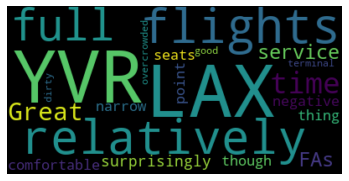

In [275]:
# Start with one review:
before_text = before_df['customer_review'].values[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(before_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [276]:
print(before_text)

YVR-LAX-YVR. Both flights relatively full and on-time. Great service FAs and surprisingly comfortable seats (though narrow). The only negative thing to point out is their terminal in LAX which is not good at all - overcrowded and dirty.


In [277]:
before_text = " ".join(review for review in before_df.customer_review)
print ("There are {} words in the combination of all review.".format(len(before_text)))

There are 7180285 words in the combination of all review.


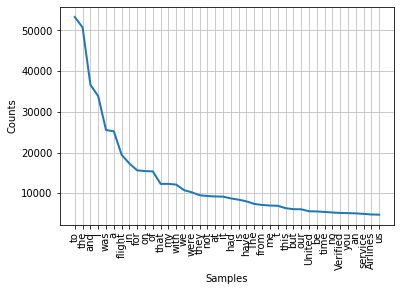

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [278]:
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(before_text)
freq = FreqDist(tokens)
freq.plot(40)

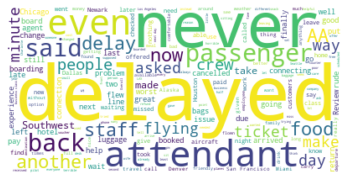

In [325]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["Verified", "Trip", "flight","flights", "one", "time", "airline", "seat", "seats", "Airlines", "airport", "hour", "hours", "plane",  "American", "Airline", "told", "United", "u", "us", "will", "bag", "customer", "service", "first", "gate", "fly", "check", "got"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(before_text)

# Display the generated image:
# the matplotlib way:  
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# During

In [309]:
during_open_day = '2019-12-12'
during_close_day = '2021-12-27'
during_con1 = df['review_date'] >= during_open_day
during_con2 = df['review_date'] < during_close_day
during_df = df[during_con1&during_con2]
during_df

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
6577,Delta Air Lines,1.0,Samantha Lawrence,2019-12-12,Not Verified | Got to the airport at 10:30am f...,NaN,Solo Leisure,Economy Class,Toronto to San Antonio via Houston,NaN,4.0,1.0,NaN,NaN,1.0,1.0,no
8145,American Airlines,1.0,Erica Minella,2019-12-12,✅ Trip Verified | Chicago to Cancun. Do not fl...,NaN,Couple Leisure,Economy Class,Chicago to Cancun,19-Dec,1.0,1.0,1.0,1.0,1.0,1.0,no
7029,Alaska Airlines,4.0,John Monitto,2019-12-12,Not Verified | Alaska's first class service is...,A321,Business,First Class,San Francisco to New York JFK,19-Dec,2.0,1.0,2.0,5.0,5.0,2.0,no
7030,Alaska Airlines,1.0,Zeb Bewak,2019-12-12,✅ Trip Verified | Fort Lauderdale to Anchorage...,NaN,Business,Economy Class,Fort Lauderdale to Anchorage via Seattle,19-Dec,1.0,1.0,1.0,1.0,1.0,1.0,no
5209,Southwest Airlines,1.0,Marjan Sobbi,2019-12-12,Not Verified | I am very aggravated with South...,NaN,Solo Leisure,Economy Class,Boise to Long Beach,19-Nov,NaN,NaN,NaN,NaN,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221,United Airlines,1.0,D Somers,2021-12-23,✅ Trip Verified | I will never be flying with ...,NaN,Couple Leisure,Economy Class,Boston to Denver,21-Dec,2.0,1.0,1.0,1.0,1.0,1.0,no
219,United Airlines,1.0,D Somers,2021-12-23,✅ Trip Verified | I will never be flying with ...,NaN,Couple Leisure,Economy Class,Boston to Denver,21-Dec,2.0,1.0,1.0,1.0,1.0,1.0,no
218,United Airlines,1.0,M Darmades,2021-12-24,"✅ Trip Verified | When they have delays, they ...",NaN,Solo Leisure,Economy Class,Newark to Raleigh Durham,21-Dec,1.0,1.0,NaN,1.0,1.0,1.0,no
4220,United Airlines,1.0,M Darmades,2021-12-24,"✅ Trip Verified | When they have delays, they ...",NaN,Solo Leisure,Economy Class,Newark to Raleigh Durham,21-Dec,1.0,1.0,NaN,1.0,1.0,1.0,no


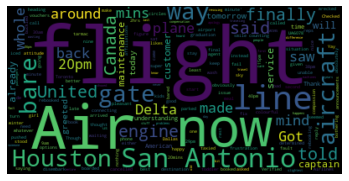

In [310]:
# Start with one review:
during_text = during_df['customer_review'].values[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(during_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [311]:
print(during_text)

Not Verified | Got to the airport at 10:30am for my 12:40pm flight with Delta Air Lines flight #UA6078 from Toronto to Houston then connecting to San Antonio. Checked in, boarded the plane, sat down, buckled up the whole nine. Aircraft pushed back from the gate at 12:38pm, taxied to get de-iced, because it's winter. After about 20mins and a colourful wash. Yay! I'm on my way- or so I thought. At 1:20pm I saw us heading back to the gate, bare in mind I've now been on this aircraft around 40 mins doing circles on the tarmac, no announcements made. When we finally parked at the gate, the captain came on saying the second engine would not start and they have called for maintenance and we should 'bare with them a minute' I've already bared 50 mins but who's counting. Around 1:50 or so we are told maintenance has arrived and has determined that they are unable to fix the issue and so we will have to disembark. At 2:20pm I got on the phone with United customer service, nice girl, after a 30 m

In [312]:
during_text = " ".join(review for review in during_df.customer_review)
print ("There are {} words in the combination of all review.".format(len(during_text)))

There are 1902158 words in the combination of all review.


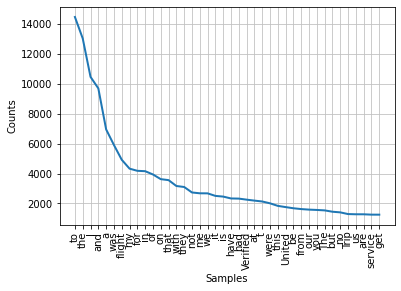

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [313]:
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(during_text)
freq = FreqDist(tokens)
freq.plot(40)

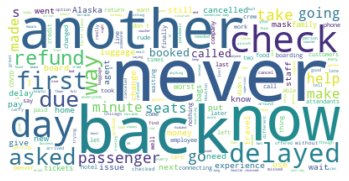

In [326]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["Verified", "Trip", "flight","flights", "one", "time", "airline", "seat", "Airlines", "airport", "hour", "plane",  "American", "Airline", "said", "United", "told", "u", "got", "us", "will", "gate", "bag", "attendant", "Southwest", "fly", "even", "customer", "service", "ticket", "people", "hours", "flying"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(during_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Post

In [327]:
post_open_day = '2021-12-27'
post_close_day = '2022-05-31'
post_con1 = df['review_date'] >= post_open_day
post_con2 = df['review_date'] < post_close_day
post_df = df[post_con1&post_con2]
post_df

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
217,United Airlines,1.0,Morris Drimmer,2021-12-27,✅ Trip Verified | Flight was late 25 minutes a...,NaN,Business,Economy Class,San Francisco to Sacramento,21-Dec,1.0,1.0,1.0,1.0,1.0,1.0,no
216,United Airlines,10.0,Veronica Fulford,2021-12-27,"Not Verified | The best customer service, beyo...",NaN,Solo Leisure,Economy Class,NaN,21-Dec,3.0,3.0,3.0,5.0,5.0,4.0,yes
215,United Airlines,1.0,Hira Bakhsh,2021-12-27,✅ Trip Verified | San Francisco to Brownsville...,NaN,Business,Premium Economy,San Francisco to Brownsville via Houston,21-Dec,1.0,1.0,1.0,1.0,1.0,1.0,no
4219,United Airlines,1.0,Morris Drimmer,2021-12-27,✅ Trip Verified | Flight was late 25 minutes a...,NaN,Business,Economy Class,San Francisco to Sacramento,21-Dec,1.0,1.0,1.0,1.0,1.0,1.0,no
6864,Alaska Airlines,1.0,Nate Smith,2021-12-27,"Not Verified | This is the worst airline ever,...",NaN,Business,Economy Class,Raleigh Durham to Seattle,21-Dec,3.0,3.0,NaN,NaN,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7614,American Airlines,1.0,Darius Tambasco,2022-05-26,✅ Trip Verified | I was in line at DFW to boar...,Boeing 737,Business,Economy Class,Dallas Ft Worth to La Guardia,22-May,3.0,2.0,1.0,4.0,5.0,3.0,yes
7613,American Airlines,2.0,R Virmasan,2022-05-26,✅ Trip Verified | Flew on May 23/24 from Honol...,A321 neo / Boeing 777-200 / A320,Family Leisure,Economy Class,"Honolulu to Wichita via Los Angeles, Dallas",22-May,2.0,4.0,1.0,2.0,1.0,3.0,no
7612,American Airlines,2.0,Sheri Bashaw,2022-05-27,✅ Trip Verified | I haven’t flown American Air...,NaN,Solo Leisure,Economy Class,Las Vegas to Tallahassee via Charlotte,22-May,1.0,1.0,1.0,1.0,1.0,1.0,no
7611,American Airlines,1.0,Malori Parks,2022-05-27,"✅ Trip Verified | Terrible, terrible, terrible...",NaN,Solo Leisure,Economy Class,Dallas to Oklahoma City,22-May,1.0,1.0,1.0,1.0,1.0,1.0,no


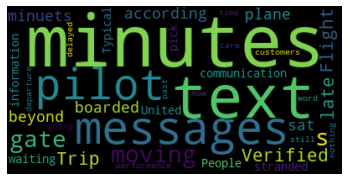

In [328]:
# Start with one review:
post_text = post_df['customer_review'].values[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(post_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [329]:
print(post_text)

✅ Trip Verified | Flight was late 25 minutes according to text messages, once plane was boarded 10 minutes beyond text messages, sat for 25 minuets with no communication from pilot as to why we were not moving from gate. People waiting to pick me up stranded with no information. Typical United performance, care nothing about customers! It’s now 21 minutes past delayed departure time, just moving from gate, still no word from pilot about what’s going on.


In [330]:
post_text = " ".join(review for review in post_df.customer_review)
print ("There are {} words in the combination of all review.".format(len(post_text)))

There are 769362 words in the combination of all review.


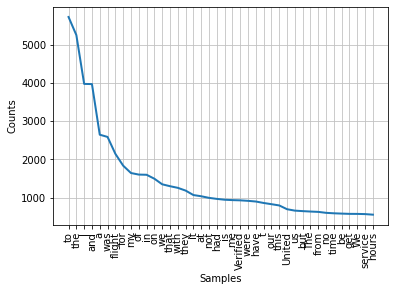

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [331]:
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(post_text)
freq = FreqDist(tokens)
freq.plot(40)

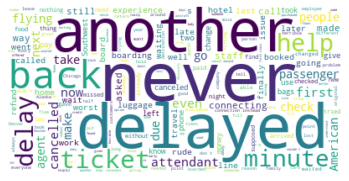

In [335]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["flight", "flights", "time", "hour", "hours", "United", "Trip", "us", "Verified", "airline", "plane", "airport", "told", "seat", "Delta", "bag", "will", "said", "customer", "service", "Airlines", "gate", "got", "seats", "fly", "day", "one"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(post_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()